# Data Exploration 04


A political think tank is preparing a public relations campain on a variety of policy issues.

In order to understand how they should best allocate their time, they've asked you to calculate some probabilities based on prior Congressional voting history.

## Part 1: Import Pandas and load the data

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/house-votes-84.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/house-votes-84.csv)


### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values? 

In [ ]:
# Part 1: Enter your code below to import Pandas according to the 
# conventional method. Then load the dataset into a Pandas dataframe.

import pandas as pd
import seaborn as sns

# Write any code needed to explore the data by seeing what the first few 
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.

votes = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/house-votes-84.csv")
votes.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Part 2: Simple Probabilities

An easy way to calcuate simple categorical feature probabilities in Pandas is through the [value_counts() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html).

Calculate the following:
   * P(class = 'republican')
   * P(class = 'democrat')
   * P(voted 'Y' on education-spending)

In [ ]:
# Write the code to calculate the specified probabilities
votes["class"].value_counts()/len(votes)

democrat      0.613793
republican    0.386207
Name: class, dtype: float64

In [ ]:
votes["education-spending"].value_counts()/len(votes)

n    0.535632
y    0.393103
?    0.071264
Name: education-spending, dtype: float64

## Part 3: Joint Probabilities
An easy way to calculate joint probabilities in Pandas is by combining the [groupby() function](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html#aggregating-statistics-grouped-by-category) with the [value_counts() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html).

Though note that value_counts() is a Pandas Series method, and will therefore not work on an entire DataFrame. See [this article](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html#each-column-in-a-dataframe-is-a-series) for details on the difference.

In 1984, congress [voted on two similar foreign-aid bills](https://www.nytimes.com/1984/05/25/world/military-aid-bill-for-el-salvador-passed-by-house.html), one to provide military aid to El Salvador `el-salvador-aid`, the other to provide military aid to rebels in Nicaragua `aid-to-nicaraguan-contras`.

Calculate the following probabilities:

* The probability that a representative voted *for* both aid packages.
* The probability that a representative voted *against* both aid packages.
* The probability that a representative voted to provide aid to El Salvador, but not Nicaragua.
* The probability that a representative voted to provide aid to Nicaragua, but not El Savador.


In [ ]:
# Write the code to calculate the specified probabilities
len(votes[(votes["el-salvador-aid"] == "y") & (votes["aid-to-nicaraguan-contras"] == "y")])/len(votes)

0.07126436781609195

In [ ]:
len(votes[(votes["el-salvador-aid"] == "n") & (votes["aid-to-nicaraguan-contras"] == "n")])/len(votes)

0.004597701149425287

In [ ]:
pd.crosstab(votes["el-salvador-aid"], votes["aid-to-nicaraguan-contras"], margins = True, normalize = True)

aid-to-nicaraguan-contras,?,n,y,All
el-salvador-aid,,,,
?,0.009195,0.009195,0.016092,0.034483
n,0.004598,0.004598,0.468966,0.478161
y,0.020690,0.395402,0.071264,0.487356
All,0.034483,0.409195,0.556322,1.000000


## Part 4: Conditional Probabilities

In 1984, congress passed the [Equal Access Act](https://mtsu.edu/first-amendment/article/1077/equal-access-act-of-1984), which forbids public secondary schools from receiving federal funds if they deny students the First Amendment right to conduct meetings because of the “religious, political, philosophical, or other content of the speech at such meetings.”

The results of this vote are recorded in the `religious-groups-in-schools` column of the dataset, coded as one of the following:

* Y - Voted yea (in favor of passage)
* N - Voted nay (against passage)
* ? - Abstained

Calcualte the following joint probabilities:

* The probability of a Democratic representative voting Yea on the Equal Access Act.
* The probability of a Republican representative voting Yea on the Equal Access Act.


In [ ]:
# Write the code to calculate the specified probabilities
# p(Y | democrat) = p(y,d) / p(d)

count_yes_dem = len(votes[(votes["religious-groups-in-schools"] == "y") & (votes["class"] == "democrat")])

In [ ]:
count_dem = len(votes [(votes["class"] == "democrat")])

In [ ]:
count_yes_dem/count_dem

0.4606741573033708

In [ ]:
pd.crosstab(votes["religious-groups-in-schools"], votes["class"], margins=True, normalize = True)

class,democrat,republican,All
religious-groups-in-schools,,,
?,0.020690,0.004598,0.025287
n,0.310345,0.039080,0.349425
y,0.282759,0.342529,0.625287
All,0.613793,0.386207,1.000000


# Part 5: Bayes' Theorem

Page 252 of your text defines Bayes' Theorem, a formula that is used in a few areas of machine learning.

Using Bayes' Theorem, calculate the following probability:

* The probability that a representative is a Democrat given that they voted Nay on the Equal Access Act.

In [ ]:
# Use Bayes' Theorem to calcuate the specified probability
# p(d|n) = p(n|d)*p(d)/p(n)

# We can get all of these values from our earlier calculations:
#   P(n|d) = 135 / 267 = 0.51 (Crosstab in Part 4) ---
#   P(d) = 0.61 (Part 2 or Crosstab in Part 4)
#   P(n) = 0.35 (Crosstab in Part 4)

pbayes = .51 * .61 / .35
pbayes 

0.8888571428571429

In [ ]:
pbayes * .35 / .61

0.51

## 🌟 Above and Beyond 🌟

1. Create some visualizations that demonstrate party values based on candidate voting history.

2. Explore other interesting relationships. Some examples might include: How likely is a candidate to vote for military spending in general if they also support religious freedom? How does party affiliation affect a candidate's likelihood to vote for or against spending in general? 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


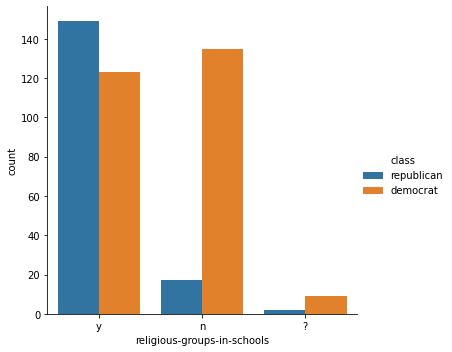

In [ ]:
sns.catplot(data = votes, x = "religious-groups-in-schools", hue = "class", kind = "count")

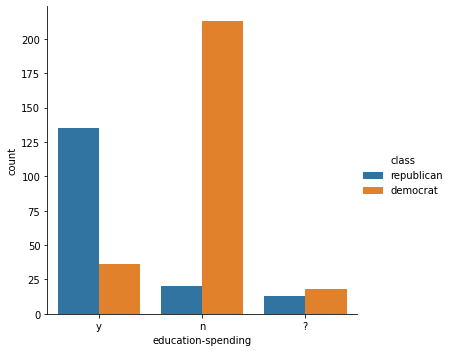

In [ ]:
sns.catplot(data = votes, x = "education-spending", hue = "class", kind = "count")